In [1]:
%matplotlib inline
import geopandas

from shapely.geometry import Point

from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
ak = geopandas.read_file("data/imd-auckland-2018.gpkg")

# Concentric annuli
This example looks at how a circular element might be fit inside difference base tiles, to produce different densities of regularly arranged motifs. The annuli idea seems well suited to conveying a relatively large number of attributes, although care would be required to make the more significant elements the larger ones, perhaps.

In [3]:
d = 200
c = [Point((0, 0)).buffer(r) for r in range(d, 0, -d//7)]
annuli = [circ.difference(c[i + 1]) for i, circ in enumerate(c[:-1])] + c[-1:]

tile = geopandas.GeoDataFrame(
    geometry = geopandas.GeoSeries(annuli),
    crs = ak.crs, data = {"element_id": list("abcdefg")}
)

<AxesSubplot:>

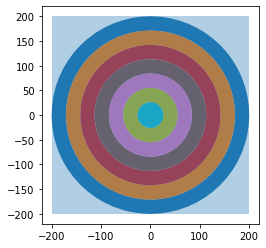

In [4]:
rect_base = TileUnit(crs = 2193, spacing = 2 * d)
rect_base.elements = tile
ax = rect_base.elements.plot(column = "element_id")
rect_base.tile.plot(ax = ax, alpha = 0.35)

<AxesSubplot:>

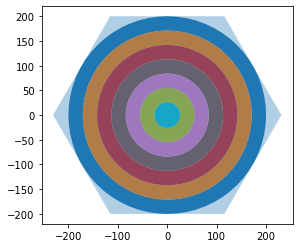

In [5]:
hex_base = TileUnit(crs = 2193, tile_shape = TileShape.HEXAGON, spacing = 2 * d)
hex_base.elements = tile
ax = hex_base.elements.plot(column = "element_id")
hex_base.tile.plot(ax = ax, alpha = 0.35)

<AxesSubplot:>

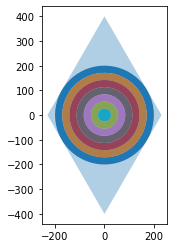

In [6]:
tri_d_base = TileUnit(crs = 2193, tile_shape = TileShape.TRIANGLE, 
                      to_hex = False, spacing = d * 4 / 3)
tri_d_base.elements = tile
ax = tri_d_base.elements.plot(column = "element_id")
tri_d_base.tile.plot(ax = ax, alpha = 0.35)

In [7]:
# tiling = Tiling(tri_d_base, ak, id_var = "DZ2018")
# tiling = Tiling(rect_base, ak, id_var = "DZ2018")
tiling = Tiling(hex_base, ak, id_var = "DZ2018")

In [8]:
t15 = tiling.get_tiled_map(rotation = 15)

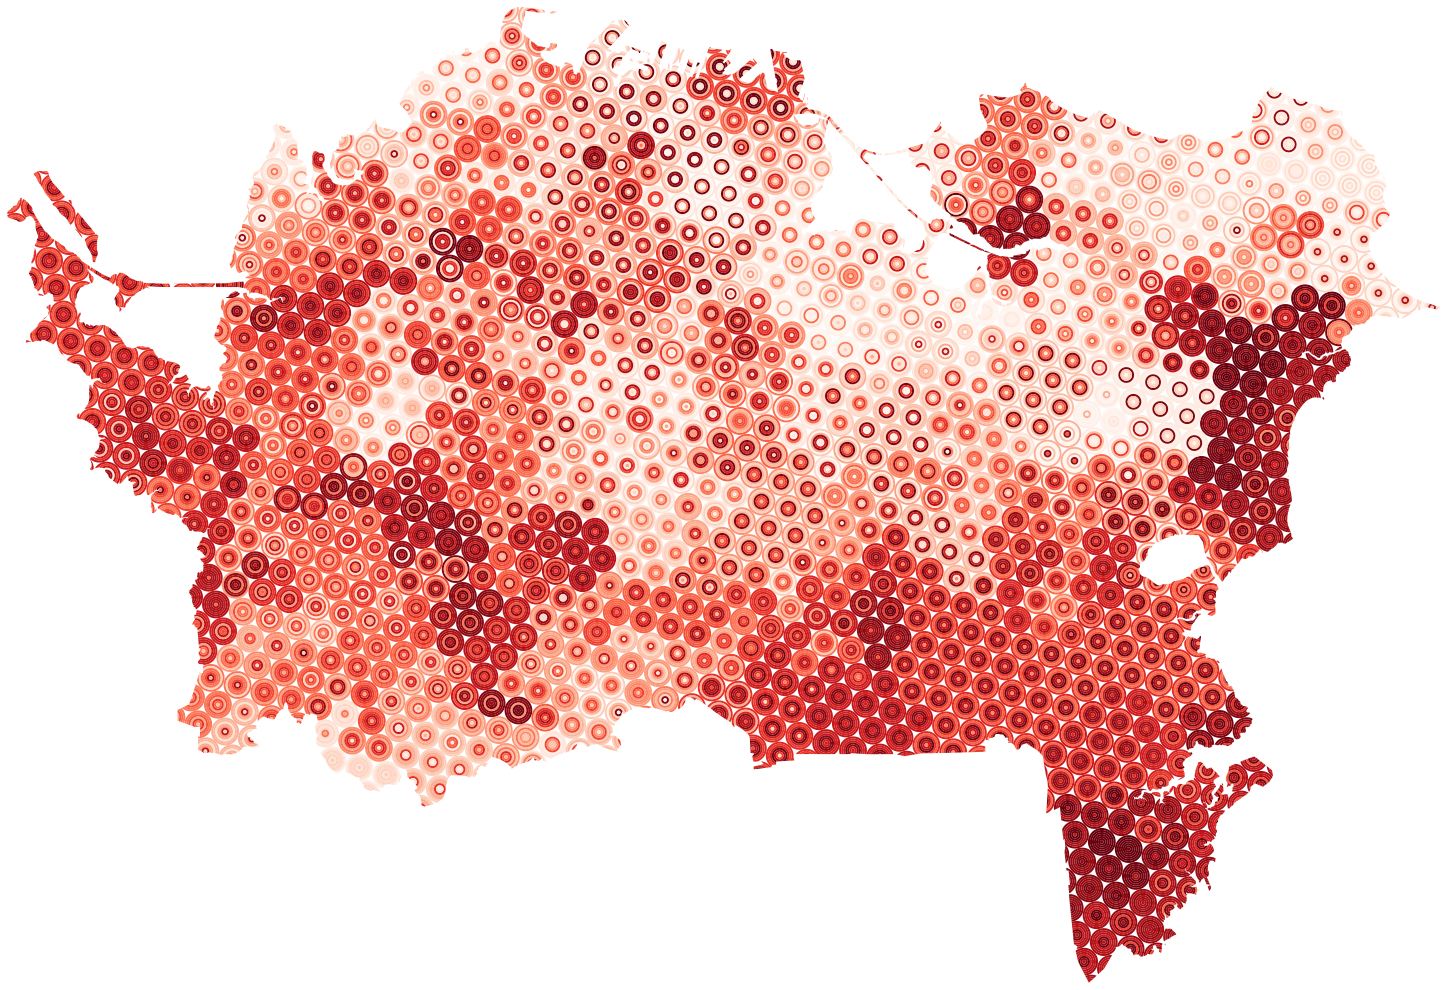

In [9]:
vars = [x for x in t15.map.columns if "Rank" in x]
t15.variables = dict(zip(list("abcdefg"), vars))
t15.colourmaps = dict(zip(t15.variables.values(), 7 * ["Reds"]))

fig = t15.render(legend = False)